In [ ]:
from yellowbrick.cluster import  KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


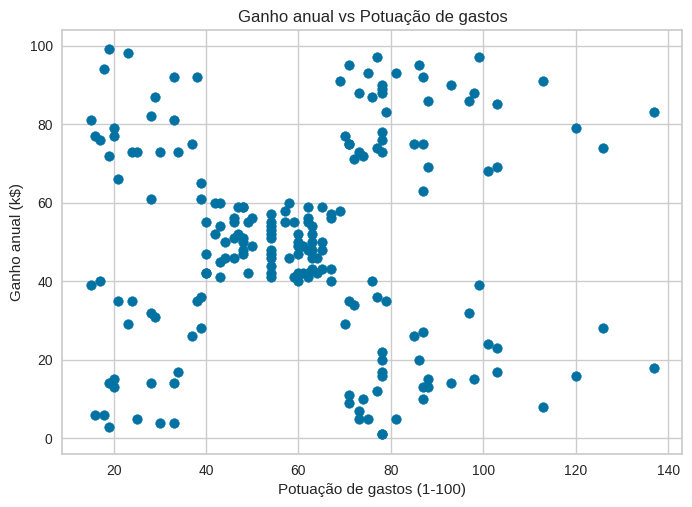

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Ganho anual vs Potuação de gastos')
plt.xlabel('Potuação de gastos (1-100)')
plt.ylabel('Ganho anual (k$)')
plt.show()

## Escolhendo parâmetros

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

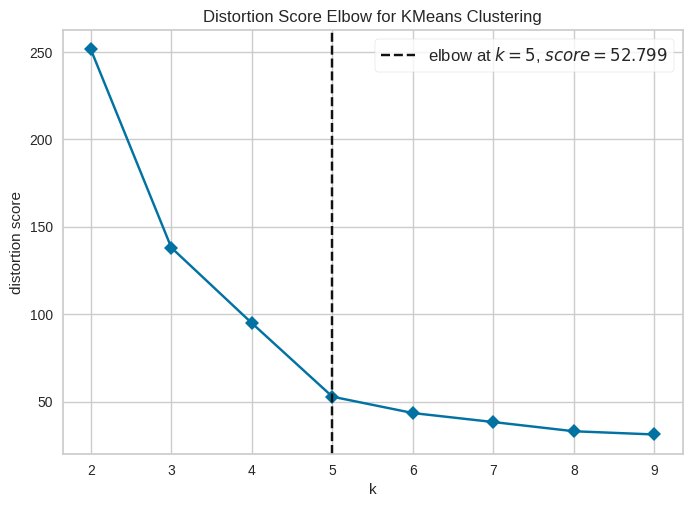

In [ ]:
model = KMeans(
    init='k-means++',
    random_state=0,
    algorithm='elkan'
    )

visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

plt.show()

## Aplicação de modelos

In [ ]:
model = KMeans(
    n_clusters=5,
    init='k-means++',
    random_state=0,
    )

df['cluster'] = model.fit_predict(X_scaled)

In [ ]:
df['cluster'] = df['cluster'].map({
    0: 'Ganha médio gasta médio',
    1: 'Ganha muito gasta muito',
    2: 'Ganha pouco gasta muito',
    3: 'Ganha pouco gasta pouco',
    4: 'Ganha muito gasta pouco'})

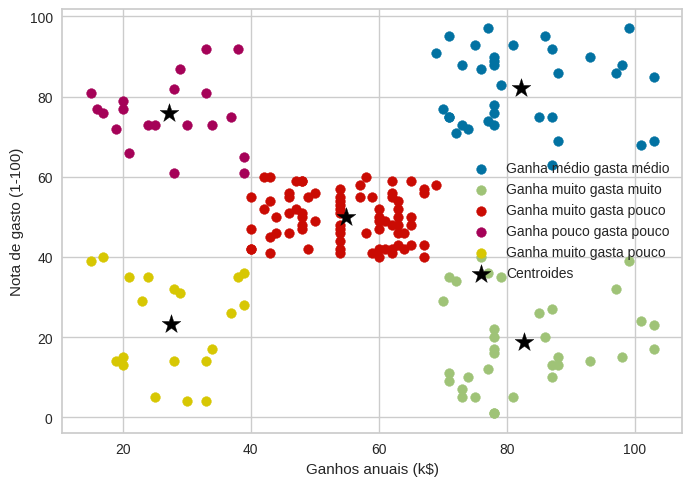

In [ ]:
labels = iter(['Ganha médio gasta médio', 'Ganha muito gasta muito', 'Ganha muito gasta pouco', 'Ganha pouco gasta pouco', 'Ganha muito gasta pouco'])
for c in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == c]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=next(labels))

centroids_original = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
             c='black', marker='*', s=200, label='Centroides')

plt.xlabel('Ganhos anuais (k$)')
plt.ylabel('Nota de gasto (1-100)')
plt.legend()
plt.show()

## Resultados

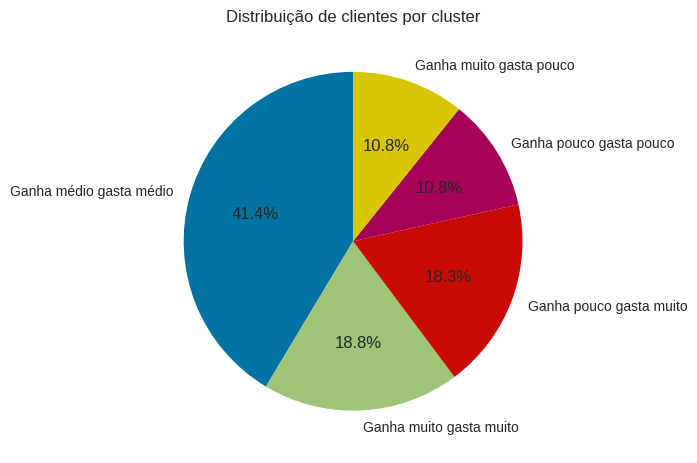

In [ ]:
counts = df.cluster.value_counts()
plt.pie(counts, labels=['Ganha médio gasta médio',
                        'Ganha muito gasta muito',
                        'Ganha pouco gasta muito',
                        'Ganha pouco gasta pouco',
                        'Ganha muito gasta pouco'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de clientes por cluster')
plt.show()

0: Ganha médio gasta médio   
1: Ganha muito gasta muito  
2: Ganha pouco gasta muito  
3: Ganha pouco gasta pouco  
4: Ganha muito gasta pouco  